In [1]:
%run "../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";

fileName = kimj;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
#display (dfOriginal )
#for c in dfOriginal.columns: print (c,  end=', ')

<IPython.core.display.Javascript object>

In [10]:
from pandas.tools.plotting import andrews_curves
#andrews_curves(dfOriginal, 'indexpef')

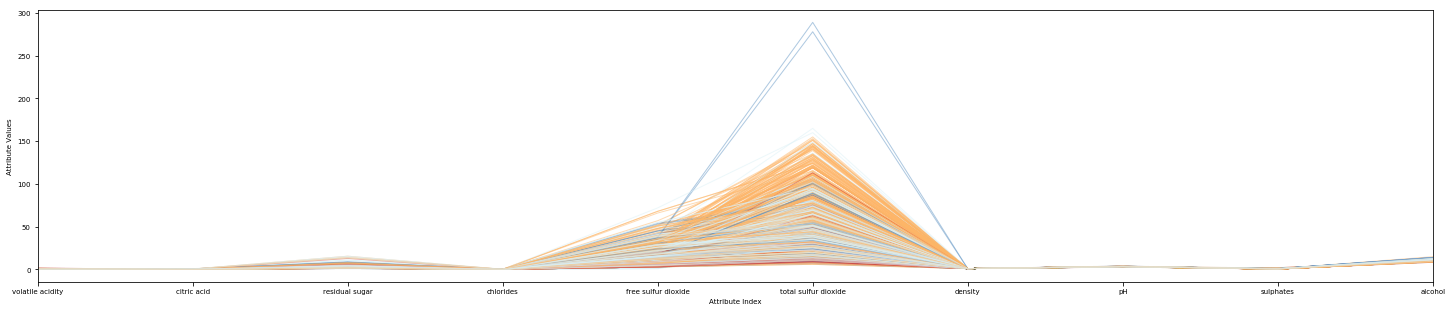

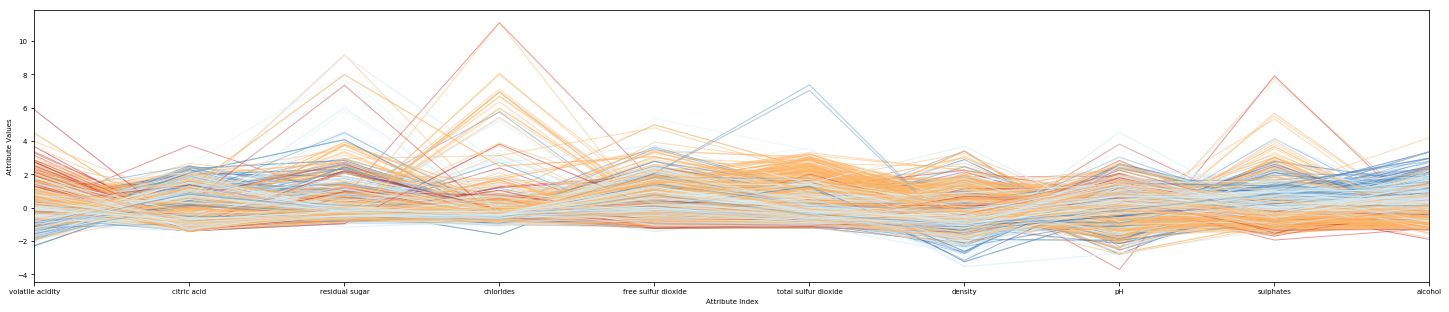

In [11]:
import pandas as pd
from pandas import DataFrame
from pylab import *
import matplotlib.pyplot as plot
from math import exp
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(target_url,header=0, sep=";")
#generate statistical summaries
summary = wine.describe()
nrows = len(wine.index)
tasteCol = len(summary.columns)
meanTaste = summary.iloc[1,tasteCol - 1]
sdTaste = summary.iloc[2,tasteCol - 1]
nDataCol = len(wine.columns) -1
plt.figure(figsize=(25, 5))

for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = wine.iloc[i,1:nDataCol]
    normTarget = (wine.iloc[i,nDataCol] - meanTaste)/sdTaste
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)
plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()
wineNormalized = wine
ncols = len(wineNormalized.columns)

plt.figure(figsize=(25, 5))
for i in range(ncols):
    mean = summary.iloc[1, i]
    sd = summary.iloc[2, i]
    wineNormalized.iloc[:,i:(i + 1)] = (wineNormalized.iloc[:,i:(i + 1)] - mean) / sd
#Try again with normalized values
for i in range(nrows):
    #plot rows of data as if they were series data
    dataRow = wineNormalized.iloc[i,1:nDataCol]
    normTarget = wineNormalized.iloc[i,nDataCol]
    labelColor = 1.0/(1.0 + exp(-normTarget))
    dataRow.plot(color=plot.cm.RdYlBu(labelColor), alpha=0.5)
plot.xlabel("Attribute Index")
plot.ylabel(("Attribute Values"))
plot.show()


In [18]:
import dtw

#from pandas.io.data import DataReader
from pandas_datareader import data
from pandas_datareader.data import DataReader
from datetime import datetime
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr

f = DataReader("F",  "yahoo", datetime(2000,1,1), datetime(2012,1,1))
f_2008=f[f.index.year==2008]
f_2009=f[f.index.year==2009]

rpy2.robjects.numpy2ri.activate()
R = rpy2.robjects.r
DTW = importr('dtw')
alignment = R.dtw(f_2008.Volume.values, f_2009.Volume.values, keep=True)
alignment.rx('distance')[0][0]



RRuntimeError: Error in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]) : 
  there is no package called 'proxy'


In [34]:
d={}
for i in range(5):
    d[i] = [rand(), rand(), rand()]
    
df = pd.DataFrame.from_dict(d, orient='index')
print(df)

print(df.sort())


      0     1     2
0 0.532 0.359 0.627
1 0.418 0.575 0.735
2 0.536 0.649 0.275
3 0.742 0.628 0.016
4 0.731 0.509 0.873
      0     1     2
0 0.532 0.359 0.627
1 0.418 0.575 0.735
2 0.536 0.649 0.275
3 0.742 0.628 0.016
4 0.731 0.509 0.873


In [37]:
df.sort([1,2])

,0,1,2
0,0.532,0.359,0.627
4,0.731,0.509,0.873
1,0.418,0.575,0.735
3,0.742,0.628,0.016
2,0.536,0.649,0.275
